In [34]:
using DataFrames
using Distances
using GLMakie
using LinearAlgebra
using Makie
using MLBase
using MultivariateStats
using Plots
using RDatasets
using Statistics
using StatsBase
using UMAP
using VegaDatasets
using XLSX

In [3]:
C = DataFrame(VegaDatasets.dataset("cars")) #loading cars dataset... 

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64?,Int64,Float64,Int64?
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


In [4]:
dropmissing!(C) # remove missing values
M = Matrix(C[:,2:7]) #getting the values in a matrixx
names(C)

9-element Vector{String}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [6]:
car_origin = C[!,:Origin]
carmap = labelmap(car_origin) #map the names into labels
uniqueids = labelencode(carmap, car_origin) # encode the car_origin into the labels

392-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 2
 1
 1
 1
 3
 1
 1
 1

In [10]:
data = copy(M)
data = (data .- mean(data, dims=1)) ./ std(data, dims=1) # normalizing data

392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   0

## Doing Principal Component Analysis 

In [12]:
p = fit(PCA, data', maxoutdim=2) #PCA takes the transpose

PCA(indim = 6, outdim = 2, principalratio = 0.919482878533357)

In [13]:
P = projection(p) #projection matrix

6×2 Matrix{Float64}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

In [15]:
Yte = MultivariateStats.transform(p, data') #reducing p

2×392 Matrix{Float64}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

In [16]:
Xr = reconstruct(p, Yte) #to 'reconstruct' the original matrix

6×392 Matrix{Float64}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

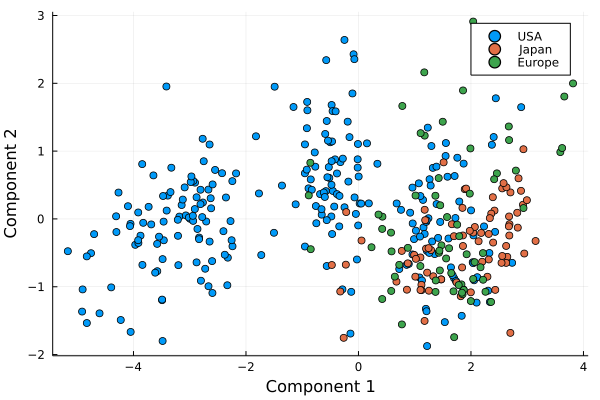

In [24]:
Plots.scatter(Yte[1,car_origin.=="USA"], Yte[2,car_origin.=="USA"], label="USA",xlabel="Component 1", ylabel="Component 2")
Plots.scatter!(Yte[1,car_origin.=="Japan"], Yte[2,car_origin.=="Japan"], label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"], Yte[2,car_origin.=="Europe"], label="Europe")

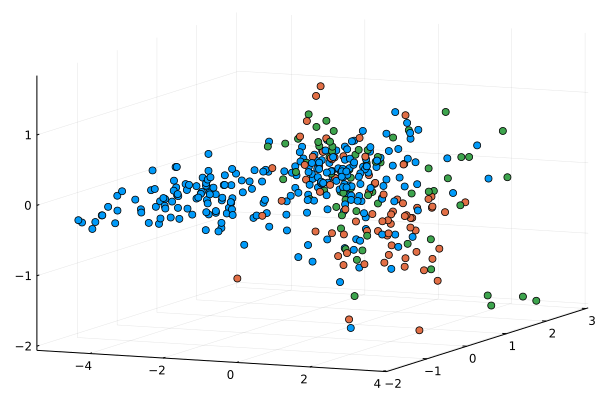

In [28]:
p = fit(PCA, data', maxoutdim=3) #doing with 3 componentes instead of 2
Yte = MultivariateStats.transform(p, data')
scatter3d(Yte[1,:], Yte[2,:], Yte[3,:], color=uniqueids, legend=false)

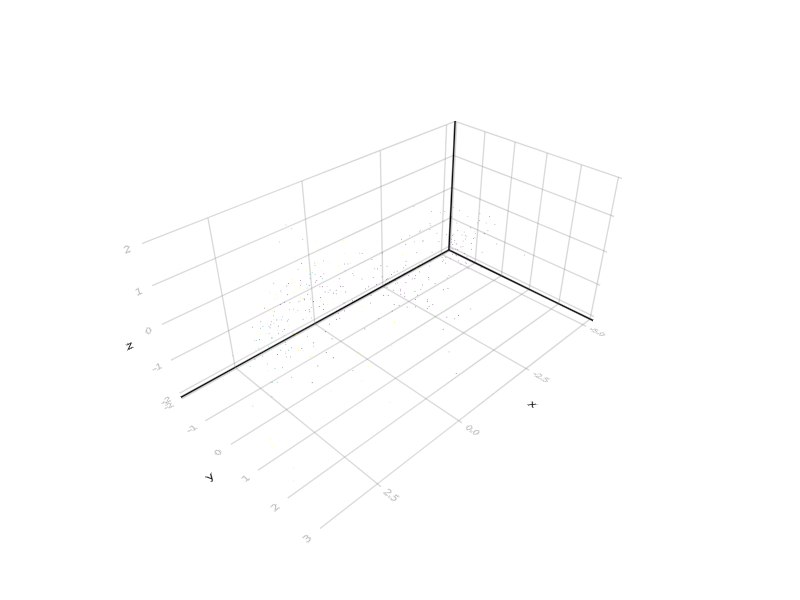

In [39]:
#using makie to create a scene
scene = Makie.scatter(Yte[1,:], Yte[2,:], Yte[3,:], ms=10, color=uniqueids)

In [37]:
display(scene)

GLMakie.Screen(...)

In [41]:
# t-SNE
using TSne

In [43]:
Ysne = tsne(data, 2)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/alfredo/.julia/packages/ProgressMeter/Vf8un/src/ProgressMeter.jl:620
Computing t-SNE100%|████████████████████████████████████| Time: 0:00:00
  KL_divergence:  0.3576


392×2 Matrix{Float64}:
  29.436    17.6399
  32.6861   21.4593
  29.7503   19.4886
  30.0554   18.6261
  29.262    19.6454
  37.5108   26.0672
  37.9705   26.9751
  37.5569   27.0279
  38.5334   26.9054
  36.2565   26.6591
  32.2681   22.6445
  31.0284   22.5272
  31.6536   22.6491
   ⋮       
  14.8385   -9.16326
 -19.0871    4.07529
 -18.2596  -14.2076
  11.9369   -5.55862
 -30.3444  -14.9413
 -29.8028  -13.6627
 -16.933    -3.87179
 -17.2643   -9.35268
 -32.4578    2.00107
 -28.5189  -14.6643
 -19.2841   -1.91186
 -20.2537   -0.803535

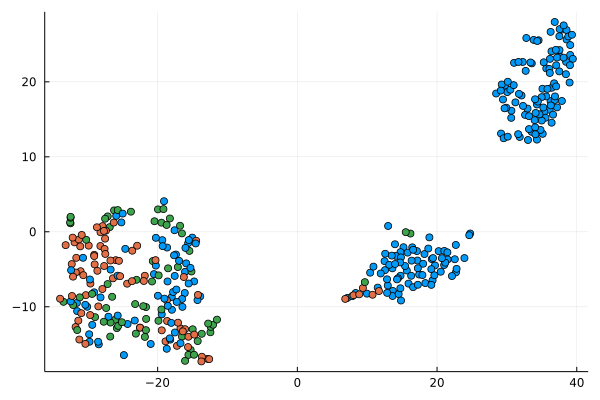

In [47]:
Plots.scatter(Ysne[:,1], Ysne[:,2], color=uniqueids,leg=false)

In [54]:
#UMAP
L = pairwise(Euclidean(),data,data,dims=1)
embedding = umap(L,2)

2×392 Matrix{Float64}:
 -7.18845  -9.04815    -7.60322  -7.45594  …   2.81906   5.64797   5.90542
  1.8205    0.0347971   1.12352   1.27699     -3.59357  -1.85246  -2.07892

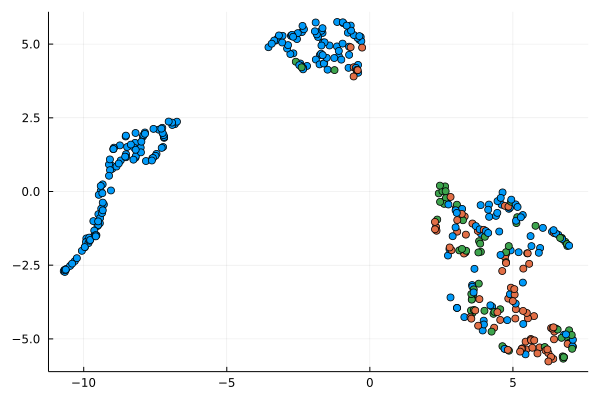

In [55]:
Plots.scatter(embedding[1,:], embedding[2,:], color=uniqueids, leg=false)